In [5]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# import the dataset
df = pd.read_csv('Wholesale_Data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [7]:
# view shape
df.shape

(440, 8)

In [8]:
# View datatypes & counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [9]:
# Select three indices of your choice you wish to sample from the dataset
indices = [25,144,368]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(df.loc[indices], columns=df.keys()).reset_index(drop=True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,16165,4230,7595,201,4003,57
1,1,3,18827,3677,1988,118,516,201
2,1,3,22335,1196,2406,2046,101,558


In [10]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [11]:
# select the feacture, 'Milk', 'Grocery'
X = df.iloc[:, [3, 4]].values

Text(0.5, 1.0, 'Dendrogram')

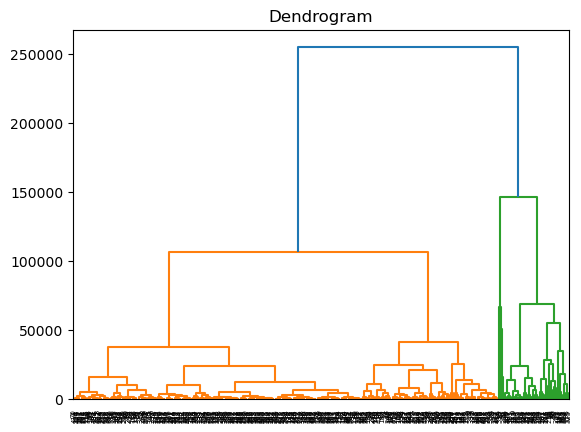

In [12]:
# Create dendrogram in order to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward', metric='euclidean'))
plt.title('Dendrogram')

In [13]:
# Training the Hierarchical Clustering model on the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

/Users/Mahamed/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/Mahamed/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/Mahamed/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/Mahamed/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/Maham

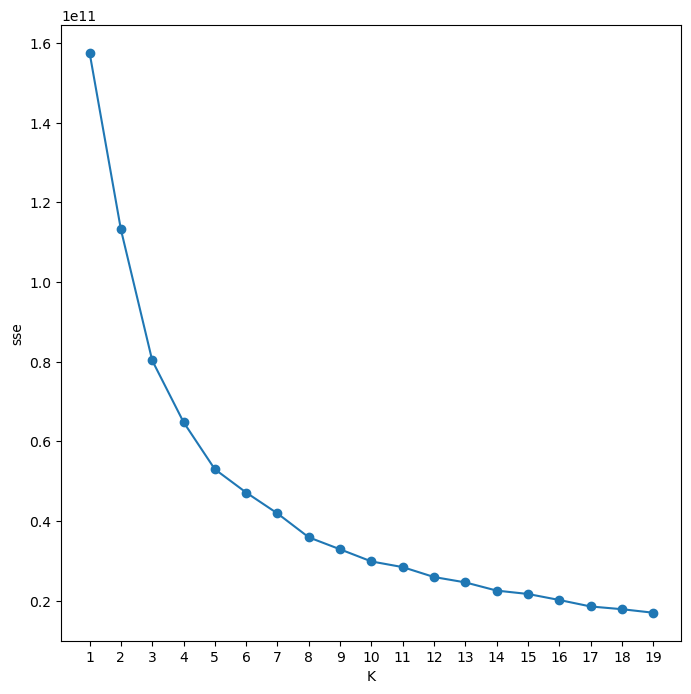

In [34]:
from sklearn.cluster import KMeans

sse = []
list_k = list(range(1, 20))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(8, 8))
plt.plot(list_k, sse, '-o')
plt.xticks(list_k, list(range(1,20,1)))
plt.xlabel('K')
plt.ylabel('sse');

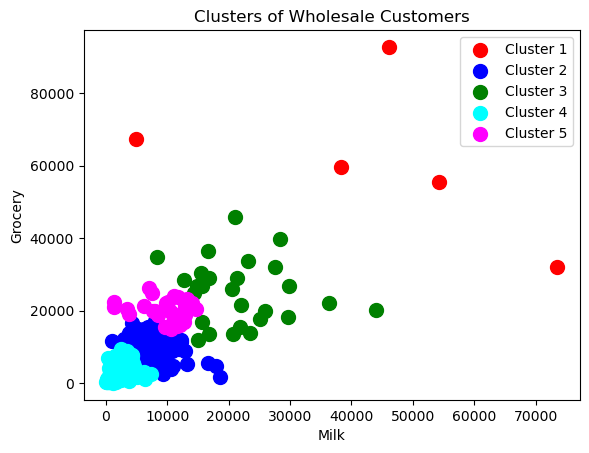

In [14]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of Wholesale Customers')
plt.xlabel('Milk')
plt.ylabel('Grocery')
plt.legend()
plt.show()

In [15]:
# Select three indices of your choice you wish to sample from the dataset
indices = [22,154,398]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(df.loc[indices], columns=df.keys()).reset_index(drop=True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,3,31276,1917,4469,9408,2381,4334
1,1,3,622,55,137,75,7,8
2,1,3,11442,1032,582,5390,74,247


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0.5, 0, 'Channel'),
  Text(1.5, 0, 'Region'),
  Text(2.5, 0, 'Fresh'),
  Text(3.5, 0, 'Milk'),
  Text(4.5, 0, 'Grocery'),
  Text(5.5, 0, 'Frozen'),
  Text(6.5, 0, 'Detergents_Paper'),
  Text(7.5, 0, 'Delicassen')])

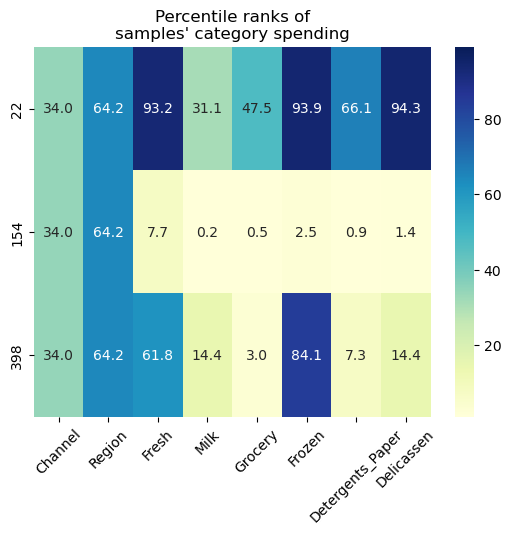

In [16]:
# look at percentile ranks
#pcts = 100. * data.rank(axis=0, pct=True).iloc[indices].round(decimals=3)
pcts = 100. * df.rank(axis=0, pct=True).iloc[indices].round(decimals=3)
# visualize percentiles with heatmap

sns.heatmap(pcts, annot=True, vmin=1, vmax=99, fmt='.1f', cmap='YlGnBu')
plt.title('Percentile ranks of\nsamples\' category spending')
plt.xticks(rotation=45, ha='center')

Sample 0: This customer ranks above the 90th percentile in annual spending for Fresh, Frozen, and Delicatessen items, with above-average spending on detergents_paper. These spending patterns suggest it might be a market, known for offering a diverse range of fresh foods and deli products.

Sample 1: Conversely, this customer ranks in the bottom 10th percentile across all categories, with 'Fresh' being its highest-ranking category. This indicates it might be a small cafe or a similar establishment.

Sample 2: The last customer spends significantly on Fresh and Frozen items, with a stronger focus on Frozen foods. It appears to be a wholesale retailer specializing in Fresh and Frozen products.

In [17]:
# Import libraries for Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Remove column Milk
new_data = df.drop('Milk',axis=1)

In [18]:
# Split the data into training and testing sets(0.30) using the given feature as the target

X_train, X_test, y_train, y_test = train_test_split(new_data, df['Milk'], test_size=0.30, random_state=1)

# Implement decision tree regressor and fit it to the training set
regressor =  DecisionTreeRegressor(random_state=1)
regressor.fit(X_train, y_train)

# Print score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print(score)

0.3339048114566091


 We have attempted to predict Milk using the other features in the dataset and the score ended up being 0.333. 
Based on this we might say that this feature is somewhat difficult to predict because the score is around the halfway point of possible scores.
R^2 goes from 0 to 1. This might indicate that it could be an important feature to consider.

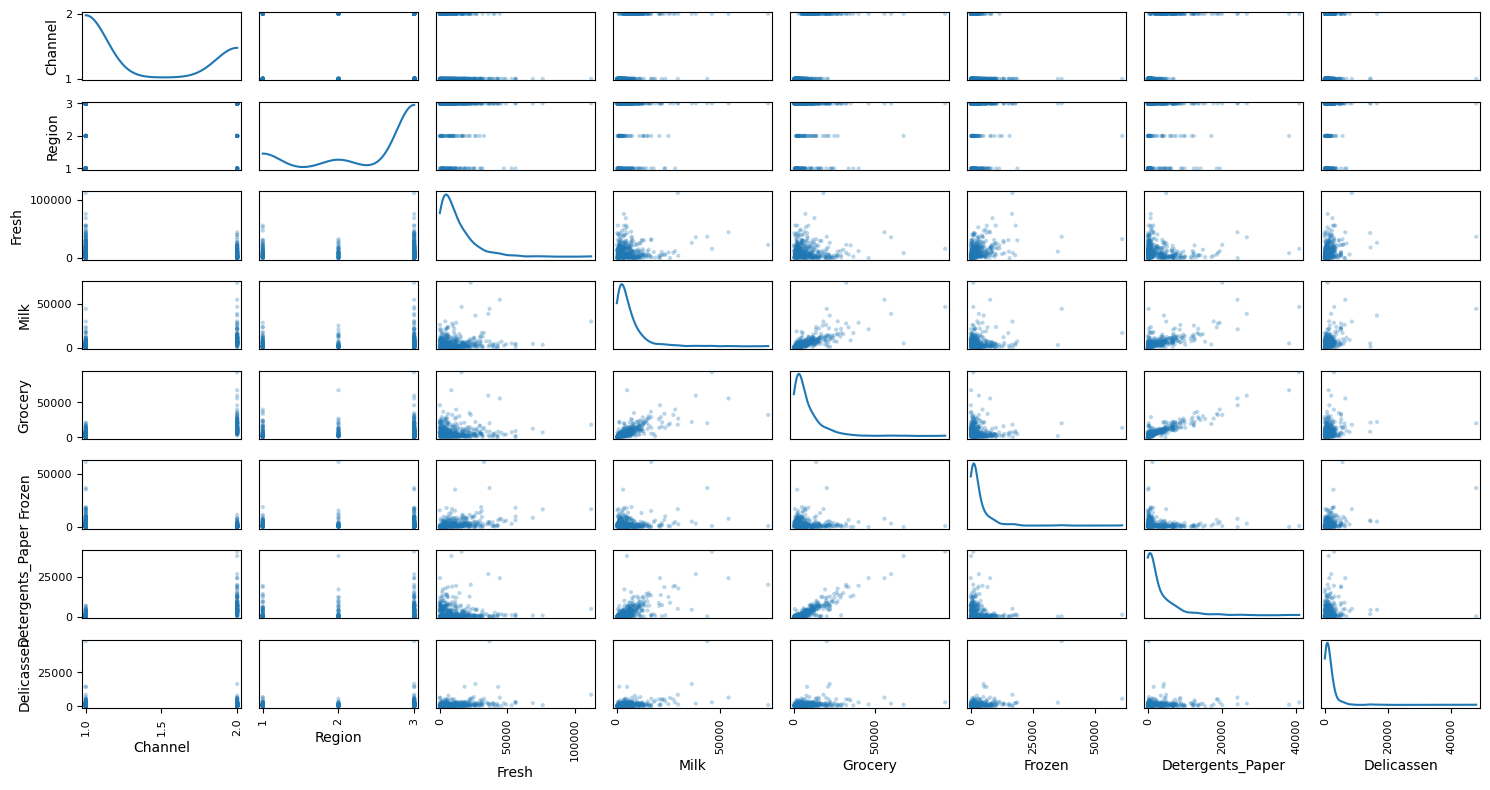

In [19]:
# Visualize feature distribution

pd.plotting.scatter_matrix(df, alpha=0.3,figsize=(15,8),diagonal='kde' )
plt.tight_layout()

Milk exhibited correlations with about half of the features, as predicted. 
Detergents_Paper and Grocery showed the highest correlation, 
which is intuitive since they are commonly bought together. Notably, many features compared to Delicatessen showed points around 0, 
indicating right-skewed data with long tails.

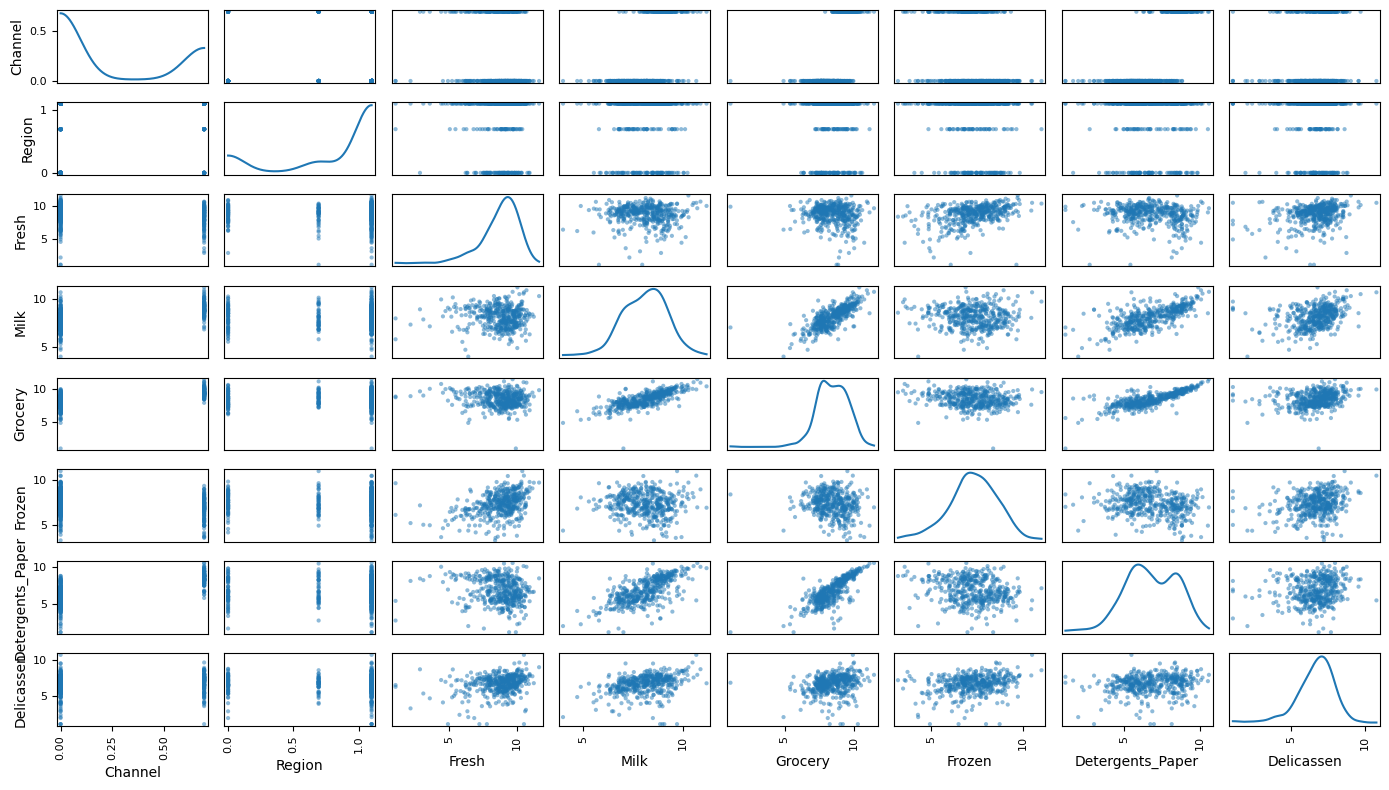

In [20]:
# Create scale for natural logarithm
log_data = np.log(df.copy())

# Create Scale using sample data for the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha=0.5, figsize=(14,8),diagonal='kde')
plt.tight_layout()

With natural logarithm scaling, features' distributions become more normal. 
Check if previously identified correlated feature pairs still maintain their correlation, and note any changes in the strength of the correlation.

In [21]:
# Let's compare the original sample data to the log-transformed sample data
print("Original chosen samples of wholesale customers dataset:")
display(samples)

# Display the log-transformed sample data
print("Log-transformed samples of wholesale customers dataset:")
display(log_samples)

Original chosen samples of wholesale customers dataset:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,3,31276,1917,4469,9408,2381,4334
1,1,3,622,55,137,75,7,8
2,1,3,11442,1032,582,5390,74,247


Log-transformed samples of wholesale customers dataset:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.0,1.098612,10.350606,7.558517,8.404920,9.149316,7.775276,8.374246
1,0.0,1.098612,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
2,0.0,1.098612,9.345046,6.939254,6.366470,8.592301,4.304065,5.509388


In [22]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():

    # Calculate Q1 for feature
    Q1 = np.percentile(log_data, 25)

    # Calculate Q3 for feature
    Q3 = np.percentile(log_data, 75)

    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5

In [23]:
# Display the outliers for all features
features = ['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

for feature in features:
    Q1 = np.percentile(log_data[feature], 25)
    Q3 = np.percentile(log_data[feature], 75)
    step = 1.5 * (Q3 - Q1)

    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])


Data points considered outliers for the feature 'Channel':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen


Data points considered outliers for the feature 'Region':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
196,0.000000,0.0,10.329539,8.883086,8.496378,9.836867,6.637258,7.964156
197,0.693147,0.0,7.794411,8.867427,9.248695,7.027315,8.369621,7.291656
198,0.000000,0.0,9.366147,7.675082,8.828201,8.168203,6.383507,6.546785
199,0.000000,0.0,9.176784,7.731931,7.655391,6.253829,5.996452,5.849325
200,0.693147,0.0,8.028455,9.490998,10.048756,8.279190,9.206232,6.594413
...,...,...,...,...,...,...,...,...
268,0.693147,0.0,9.384966,8.993800,9.895808,6.974479,8.759982,6.548219
269,0.000000,0.0,9.630234,5.552960,7.037028,7.830426,5.808142,5.318120
270,0.000000,0.0,8.459564,6.939254,6.882437,8.612503,5.283204,4.025352
271,0.000000,0.0,7.641564,8.518592,7.354362,7.021084,4.990433,7.346010


Data points considered outliers for the feature 'Fresh':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
65,0.693147,1.098612,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,0.000000,1.098612,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,0.693147,1.098612,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,0.000000,1.098612,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,0.693147,1.098612,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,0.000000,1.098612,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,0.693147,1.098612,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,0.693147,1.098612,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,0.693147,0.000000,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,0.693147,0.693147,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
86,0.693147,1.098612,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,0.000000,1.098612,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,0.000000,1.098612,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,0.000000,1.098612,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,0.0,1.098612,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,0.0,1.098612,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
38,0.693147,1.098612,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,0.693147,1.098612,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,0.693147,1.098612,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,0.693147,1.098612,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,0.693147,1.098612,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,0.693147,0.000000,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,0.000000,0.693147,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,0.000000,1.098612,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,0.000000,1.098612,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,0.000000,1.098612,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,0.0,1.098612,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,0.0,1.098612,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicassen':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
66,0.000000,1.098612,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,0.693147,1.098612,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,0.000000,1.098612,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,0.000000,1.098612,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,0.000000,1.098612,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,0.000000,1.098612,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,0.000000,1.098612,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,0.000000,1.098612,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,0.000000,1.098612,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,0.000000,0.000000,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


In [24]:
    # Selecting rows with multiple features with outliers 
outliers  = [66, 75, 338, 142, 154, 289]

# Remove the outliers 
clean_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)


Chose to remove specific rows with outliers in multiple features as it boosts confidence in their outlier status.
Next step is to implement Feature Transformation using PCA

In [25]:
from sklearn.decomposition import PCA

# Apply PCA by fitting the clean_data with the same number of dimensions as features
pca = PCA(n_components=6)
pca.fit(clean_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

In [26]:
print(pca.components_)

[[-1.16323557e-01 -8.19434813e-03  2.11359923e-01 -3.91946401e-01
  -4.37295284e-01  2.05231531e-01 -7.37216195e-01 -1.06168822e-01]
 [-4.78569503e-03  4.28453188e-03 -6.44088120e-01 -1.85199449e-01
  -1.11833896e-01 -5.10252001e-01 -8.63004357e-02 -5.20094902e-01]
 [-2.22813792e-02 -1.08174213e-02 -6.28915224e-01  6.57390079e-02
  -3.60052745e-02  8.99930714e-02 -2.68849471e-01  7.19621690e-01]
 [-7.54887270e-04 -4.03980500e-02 -3.80048901e-01  1.32387933e-02
   6.12145916e-03  8.27899149e-01  1.65476223e-01 -3.75390651e-01]
 [-1.53084607e-02  1.79097421e-02  1.08622965e-02  7.43741474e-01
   3.07525983e-01 -1.08541754e-02 -5.40410789e-01 -2.43806598e-01]
 [ 3.06226293e-02 -1.98217334e-01  1.81116440e-04 -4.90978400e-01
   8.18718600e-01  3.49372080e-02 -2.17230425e-01 -1.58381803e-03]]


In [27]:
print(pca.explained_variance_)

[4.58738954 2.78078876 1.13750117 1.01831754 0.46756948 0.19901346]


Comparing these variance values, we can observe that Feature 1 has the highest variance (4.58738954), indicating the most significant spread of data points within that feature. On the other hand, Feature 6 has the lowest variance (0.19901346), suggesting that the data points in this feature are closely clustered around the mean value. 
The other features fall in between these extremes in terms of spread and variability.

In [28]:
pca_samples

array([[ 0.12512987, -2.79996624,  0.07816734,  0.43400699, -1.36624917,
         0.03908966],
       [ 6.18708469,  7.01318986, -0.96341491, -0.7473111 , -0.38426329,
         0.03622498],
       [ 3.79559124,  0.26414102, -0.43524347,  0.83537823,  0.11577745,
        -0.58683488]])

/Users/Mahamed/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster centers:
[[ 2.74388609 -0.30914694 -0.4816365  -0.46459427  0.31291027  0.40013786]
 [-1.34959463  1.58616568 -3.09186699 -0.77420908  0.18464974 -0.13456214]
 [ 0.67152155  1.46026302 -1.72348346 -2.09473486  0.48617764 -0.75991651]]
Labels for each data point:
[1 2 0]


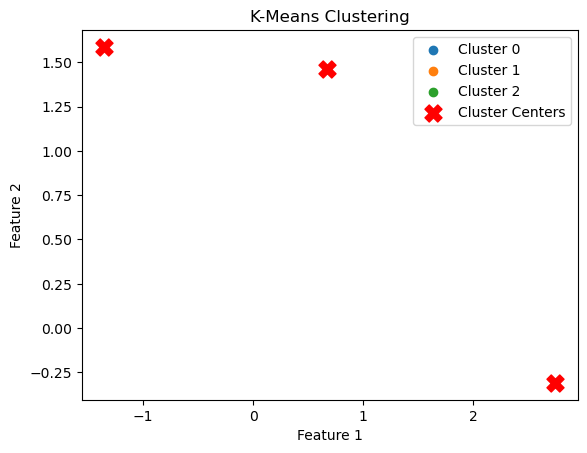

In [36]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# The given array
data = np.array([[-1.34959463, 1.58616568, -3.09186699, -0.77420908, 0.18464974, -0.13456214],
                 [0.67152155, 1.46026302, -1.72348346, -2.09473486, 0.48617764, -0.75991651],
                 [2.74388609, -0.30914694, -0.4816365, -0.46459427, 0.31291027, 0.40013786]])

# Number of clusters 
num_clusters = 3

# Create the KMeans model and fit it to the data
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_model.fit(data)

# Get the cluster centers and labels for each data point
cluster_centers = kmeans_model.cluster_centers_
labels = kmeans_model.labels_

print("Cluster centers:")
print(cluster_centers)

print("Labels for each data point:")
print(labels)

# Visualize the clusters
for i in range(num_clusters):
    plt.scatter(data[labels == i][:, 0], data[labels == i][:, 1], label=f'Cluster {i}')

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=150, label='Cluster Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('K-Means Clustering')
plt.show()


The K-Means clustering algorithm was applied to the dataset, 
resulting in the identification of three distinct clusters. 
The cluster centers represent the centroids of each cluster.
each row indicating the feature values that define the characteristics of the cluster. 
The first cluster center has relatively higher values in the 'Fresh' and 'Delicassen' features
the second cluster center shows higher values in the 'Milk' and 'Grocery' features. 
The third cluster center, on the other hand, exhibits higher values in the 'Milk' and 'Frozen' features. 
The assigned labels for each data point indicate which cluster each data point belongs to, based on its similarity to the cluster centers.
 This unsupervised learning technique has successfully grouped similar data points into clusters, 
enabling us to gain valuable insights into the underlying patterns and structures within the dataset.